# Diagnostics: ATM

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('/glade/u/home/fengzhu/Github/x4c/docsrc/notebooks')
import numpy as np
import x4c
print(x4c.__version__)

2024.4.16


## Load a postprocessed CESM timeseries case

In [8]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005'
case = x4c.Timeseries(dirpath)

>>> case.root_dir: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005
>>> case.path_pattern: comp/proc/tseries/month_1/casename.mdl.h_str.vn.timespan.nc
>>> case.grid_dict: {'atm': 'ne16', 'lnd': 'ne16', 'rof': 'ne16', 'ocn': 'g16', 'ice': 'g16'}
>>> case.vars_info created


### ts:GMST 

>>> case.ds["TS"] created
>>> case.diags["ts:GMST:ann"] created


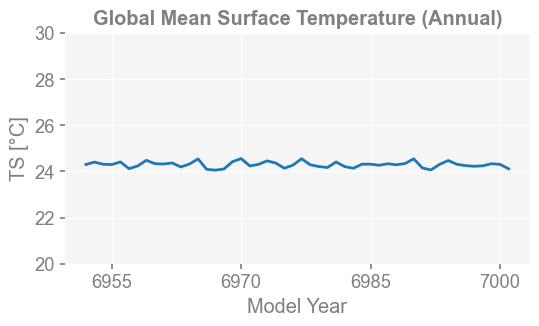

In [4]:
x4c.set_style('web', font_scale=1.2)
case.calc('ts:GMST:ann', load_idx=-1)
fig, ax = case.plot('ts:GMST:ann')

>>> case.ds["TS"] already loaded but will be reloaded due to a different `load_idx`
>>> case.ds["TS"] created
>>> case.diags["ts:GMST:6,7,8"] created


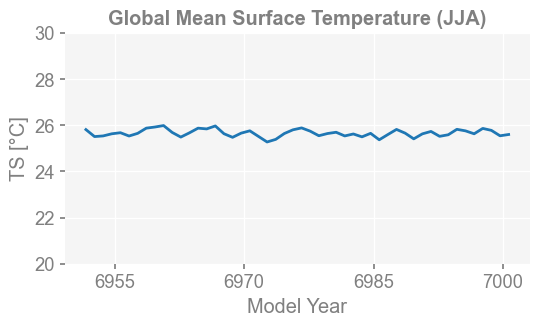

In [67]:
case.calc('ts:GMST:6,7,8', load_idx=-2)
fig, ax = case.plot('ts:GMST:6,7,8')

### map:TS

>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.diags["map:TS:ann"] created
>>> case.ds["SSH"] already loaded; to reload, run case.clear_ds("SSH") before case.load("SSH")


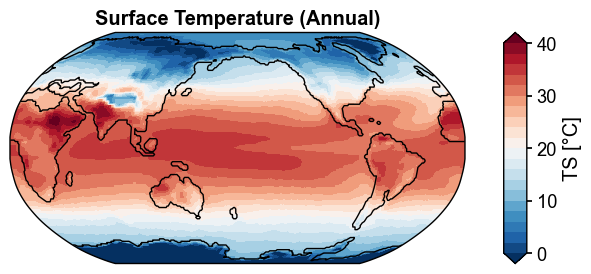

In [10]:
x4c.set_style('journal', font_scale=1.2)
case.calc('map:TS:ann', load_idx=-1)
fig, ax = case.plot('map:TS:ann')

>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.diags["map:TS:-12,1,2"] created
>>> case.ds["SSH"] already loaded; to reload, run case.clear_ds("SSH") before case.load("SSH")


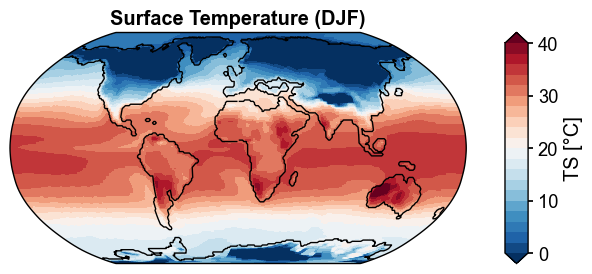

In [11]:
case.calc('map:TS:-12,1,2', load_idx=-1)
fig, ax = case.plot('map:TS:-12,1,2', central_longitude=0)

### map:LST

Regridding from [1, 13826] to [180, 360]
>>> case.ds["TS"] created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["LANDFRAC"] created
>>> case.diags["map:LST:ann"] created
>>> case.ds["SSH"] created


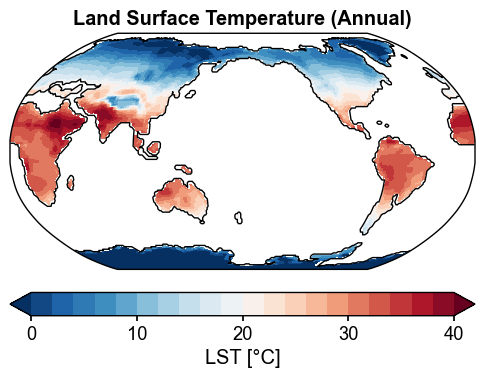

Figure saved at: "figs/map_LST_ann.pdf"


In [3]:
x4c.set_style('journal', font_scale=1.2)
case.calc('map:LST:ann', load_idx=-1)
fig, ax = case.plot(
    'map:LST:ann',
    figsize=(6, 6),
    cbar_kwargs={'orientation': 'horizontal', 'aspect': 20, 'pad': 0.05},
)
x4c.showfig(fig)
x4c.savefig(fig, './figs/map_LST_ann.pdf')

In [4]:
import pandas as pd

filename = '/glade/work/fengzhu/Projects/MioMIP1/Data_02_28_20_clean_MidMioceneSlab_MAT.csv'
MIDMIO_MAT = pd.read_csv(filename, header=0, sep=',')
MIDMIO_MAT

,Palaeo_lat,Palaeo_long,MAT,uncert,Palaeo_long_adjusted
0,56.364,71.822,9.00,1.00,71.822
1,41.092,34.232,19.00,1.80,34.232
2,39.064,33.475,19.00,1.80,33.475
3,47.516,14.805,18.50,2.50,14.805
4,37.692,27.013,19.15,2.15,27.013
...,...,...,...,...,...
106,-48.902,178.054,20.20,1.00,178.054
107,-61.581,133.736,11.00,5.00,133.736
108,36.482,105.144,16.50,2.50,105.144
109,-31.600,132.418,17.00,5.00,132.418


>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.ds["LANDFRAC"] already loaded; to reload, run case.clear_ds("LANDFRAC") before case.load("LANDFRAC")
>>> case.diags["map:LST:ann"] created
>>> case.ds["SSH"] already loaded; to reload, run case.clear_ds("SSH") before case.load("SSH")


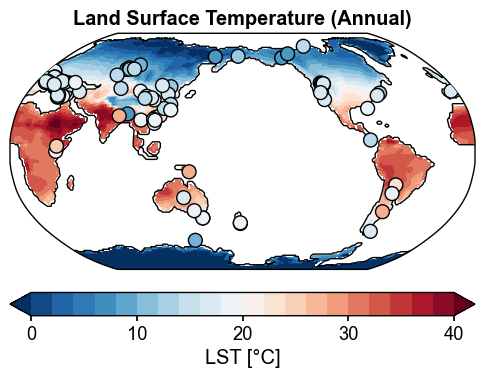

Figure saved at: "figs/map_LST_ann_with_sites.pdf"


In [5]:
x4c.set_style('journal', font_scale=1.2)
case.calc('map:LST:ann', load_idx=-1)
fig, ax = case.plot(
    'map:LST:ann',
    figsize=(6, 6),
    cbar_kwargs={'orientation': 'horizontal', 'aspect': 20, 'pad': 0.05},
    df_sites=MIDMIO_MAT, colname_dict={
        'lat': 'Palaeo_lat',
        'lon': 'Palaeo_long',
        'value': 'MAT',
    }
)
x4c.showfig(fig)
x4c.savefig(fig, './figs/map_LST_ann_with_sites.pdf')

>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.ds["LANDFRAC"] already loaded; to reload, run case.clear_ds("LANDFRAC") before case.load("LANDFRAC")
>>> case.diags["map:LST:6,7,8"] created
>>> case.ds["SSH"] already loaded; to reload, run case.clear_ds("SSH") before case.load("SSH")


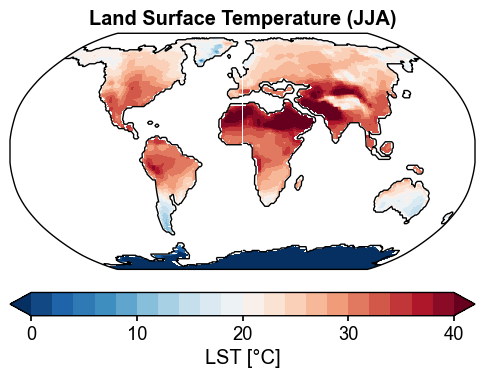

In [13]:
case.calc('map:LST:6,7,8', load_idx=-1)
fig, ax = case.plot(
    'map:LST:6,7,8',
    figsize=(6, 6),
    cbar_kwargs={'orientation': 'horizontal', 'aspect': 20, 'pad': 0.05},
    central_longitude=0,
)
x4c.showfig(fig)


Note the blank line above.
We can set `cyclic=True` to avoid it.

>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.ds["LANDFRAC"] already loaded; to reload, run case.clear_ds("LANDFRAC") before case.load("LANDFRAC")
>>> case.diags["map:LST:-12,1,2"] created
>>> case.ds["SSH"] already loaded; to reload, run case.clear_ds("SSH") before case.load("SSH")


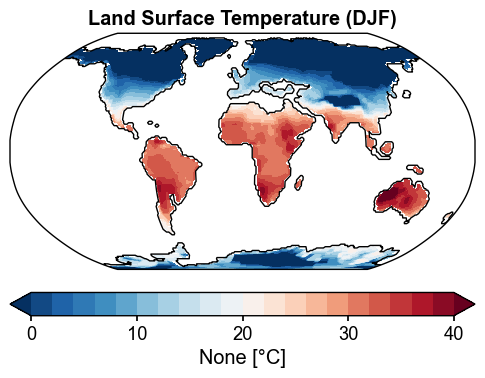

In [14]:
case.calc('map:LST:-12,1,2', load_idx=-1)
fig, ax = case.plot(
    'map:LST:-12,1,2',
    figsize=(6, 6),
    cbar_kwargs={'orientation': 'horizontal', 'aspect': 20, 'pad': 0.05},
    central_longitude=0,
    cyclic=True,
)
x4c.showfig(fig)


### zm:LST

Regridding from [1, 13826] to [180, 360]


>>> case.ds["TS"] created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["LANDFRAC"] created
>>> case.diags["zm:LST:ann"] created


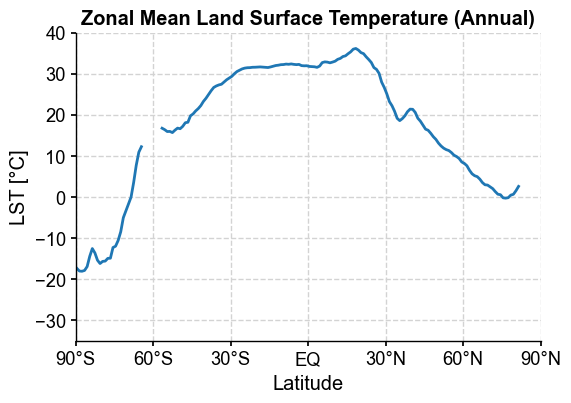

In [9]:
x4c.set_style('journal', font_scale=1.2)
case.calc('zm:LST:ann', load_idx=-1)
fig, ax = case.plot(
    'zm:LST:ann',
    figsize=(6, 4)
)

In [10]:
import pandas as pd
filename='/glade/work/fengzhu/Projects/MioMIP1/Data_02_28_20_clean_MidMioceneSlab_MAT.csv'
MIDMIO_MAT = pd.read_csv(filename, header=0, sep=',')
MIDMIO_MAT2= MIDMIO_MAT.values[0:-1,:]
MidMioLat=np.asarray(MIDMIO_MAT2[:,0],dtype=np.float64)
MidMioLon=np.asarray(MIDMIO_MAT2[:,1],dtype=np.float64)
MidMioMAT=np.asarray(MIDMIO_MAT2[:,2],dtype=np.float64)
MidMioMATUncert=np.asarray(MIDMIO_MAT2[:,3],dtype=np.float64)

ds_PA = x4c.load_dataset('/glade/campaign/univ/ubrn0018/data/climo/B.MMIOx2_C5_840_WISOon.cam.h0.2100-2199.climo.nc')
tas_PA = ds_PA['TS'].x.annualize()
landfrac_PA = ds_PA['LANDFRAC'].x.annualize()
lst_PA = (tas_PA-273.15).where(landfrac_PA>0.5)
da_PA_zm = lst_PA.x.zm
da_PA_zm

<xarray.DataArray 'TS' (lat: 96)> Size: 384B
array([-23.867989  , -21.863722  , -22.074615  , -19.277302  ,
       -19.482302  , -21.576187  , -21.35801   , -20.967377  ,
       -17.758644  , -14.613809  ,  -9.420395  ,  -7.455729  ,
        -0.62429357,   5.711548  ,          nan,          nan,
                nan,          nan,          nan,  13.547089  ,
        12.772919  ,  14.267558  ,  15.200829  ,  16.259644  ,
        18.08408   ,  19.035824  ,  20.59886   ,  22.15566   ,
        24.054607  ,  24.945066  ,  26.429026  ,  27.827711  ,
        29.018785  ,  30.350153  ,  32.106663  ,  33.251812  ,
        32.512035  ,  32.84953   ,  33.101173  ,  32.51787   ,
        32.31547   ,  32.22813   ,  32.32932   ,  31.86914   ,
        31.678835  ,  31.251896  ,  30.963312  ,  30.95115   ,
        31.167423  ,  30.643322  ,  30.977633  ,  31.792067  ,
        31.561476  ,  32.339798  ,  34.72491   ,  36.587757  ,
        37.664883  ,  37.82791   ,  37.302532  ,  36.579185  ,
        35.484615  ,  33.503506  ,  31.413298  ,  27.916632  ,
        24.920673  ,  21.714985  ,  19.608759  ,  18.537817  ,
        21.215086  ,  20.70523   ,  18.496826  ,  16.708508  ,
        15.485137  ,  14.0905    ,  12.19612   ,  10.738356  ,
         9.880558  ,   8.8774605 ,   7.783376  ,   6.4353495 ,
         5.102632  ,   3.1150017 ,   2.3693674 ,   0.9280669 ,
         0.09491364,  -1.0225865 ,  -2.0850809 ,  -3.2422194 ,
        -3.0250323 ,  -2.8431134 ,  -2.3544686 ,          nan,
                nan,          nan,          nan,          nan],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean within years time: mean over years

In [11]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.1.5xCO2.005'
case2 = x4c.Timeseries(dirpath)
case2.calc('zm:LST:ann')

>>> case.root_dir: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.1.5xCO2.005
>>> case.path_pattern: comp/proc/tseries/month_1/casename.mdl.h_str.vn.timespan.nc
>>> case.grid_dict: {'atm': 'ne16', 'lnd': 'ne16', 'rof': 'ne16', 'ocn': 'g16', 'ice': 'g16'}
>>> case.vars_info created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["TS"] created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["LANDFRAC"] created
>>> case.diags["zm:LST:ann"] created


In [12]:
case2.diags['zm:LST:Acosta'] = da_PA_zm

In [13]:
import xarray as xr
MioMIP1=xr.open_dataset('/glade/work/fengzhu/Projects/MioMIP1/MioMIP1.nc',decode_times=False)

>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.ds["LANDFRAC"] already loaded; to reload, run case.clear_ds("LANDFRAC") before case.load("LANDFRAC")
>>> case.diags["zm:LST:ann"] created


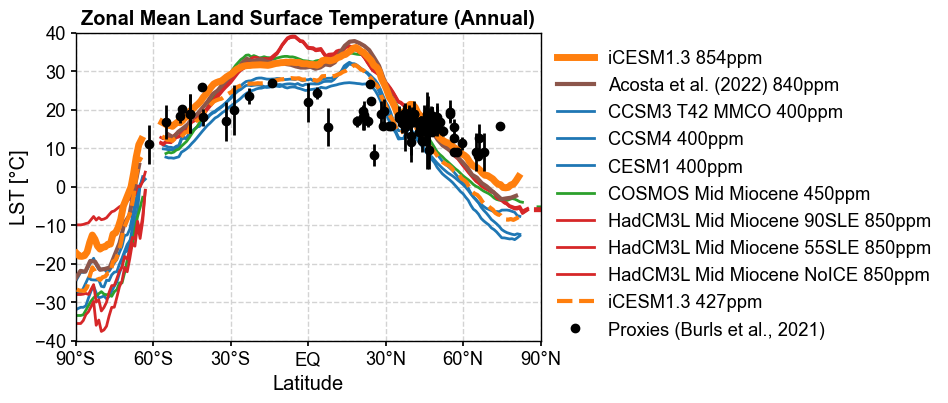

Figure saved at: "figs/zm_LST_ann_compare_model-data.pdf"


In [15]:
clr_dict = {
#    'COSMOS Late Miocene 278ppm': 'tab:cyan',
#    'COSMOS Late Miocene 450ppm': 'tab:cyan',
#    'COSMOS Late Miocene ICEQ 278ppm': 'tab:cyan',
#    'COSMOS Late Miocene ICEQ 450ppm': 'tab:cyan',
#    'NorESM-L 10Ma 350ppm': 'tab:brown',
#    'NorESM-L 10Ma 560ppm': 'tab:brown',
#    'CCSM-NH3 355ppm': 'tab:blue',
#    'CCSM-NH3 560ppm': 'tab:blue',
   'CCSM3 T42 MMCO 400ppm': 'tab:blue',
#    'CCSM3 T42 MMCO 200ppm': 'tab:blue',
#    'CCSM3 T42 MMG 200ppm': 'tab:blue',
#    'CCSM3 T42 MMG 400ppm': 'tab:blue',
   'CCSM4 400ppm': 'tab:blue',
   'CESM1 400ppm': 'tab:blue',
#    'COSMOS Mid Miocene 278ppm': 'tab:green',
   'COSMOS Mid Miocene 450ppm': 'tab:green',
#    'HadCM3L Mid Miocene 90SLE 280ppm': 'tab:red',
#    'HadCM3L Mid Miocene 90SLE 400ppm': 'tab:red',
#    'HadCM3L Mid Miocene 90SLE 560ppm': 'tab:red',
   'HadCM3L Mid Miocene 90SLE 850ppm': 'tab:red',
#    'HadCM3L Mid Miocene 55SLE 280ppm': 'tab:red',
#    'HadCM3L Mid Miocene 55SLE 400ppm': 'tab:red',
#    'HadCM3L Mid Miocene 55SLE 560ppm': 'tab:red',
   'HadCM3L Mid Miocene 55SLE 850ppm': 'tab:red',
#    'HadCM3L Mid Miocene NoICE 280ppm': 'tab:red',
#    'HadCM3L Mid Miocene NoICE 400ppm': 'tab:red',
#    'HadCM3L Mid Miocene NoICE 560ppm': 'tab:red',
   'HadCM3L Mid Miocene NoICE 850ppm': 'tab:red',
#    'HadCM3L Langhian 280ppm': 'tab:red',
#    'HadCM3L Langhian 400ppm': 'tab:red',
#    'HadCM3L Langhian 560ppm': 'tab:red',
#    'HadCM3L Late Miocene 280ppm': 'tab:red',
#    'HadCM3L Late Miocene 400ppm': 'tab:red',
#    'HadCM3L Tortonian 400ppm': 'tab:red',
#    'HadCM3L Messinian 400ppm': 'tab:red',
#    'IPSLCM 20Ma 420ppm': 'tab:orange',
#    'IPSLCM 20Ma 560ppm': 'tab:orange',
#    'IPSLCM 20Ma 840ppm': 'tab:orange',
#    'IPSLCM 20Ma NoGIS 560ppm': 'tab:orange',
#    'NorESM-L 20Ma 350ppm': 'tab:purple',
#    'NorESM-L 20Ma 560ppm': 'tab:purple',
}
x4c.set_style('journal_spines', font_scale=1.2)
case.calc('zm:LST:ann', load_idx=-1)
fig, ax = case.plot('zm:LST:ann', figsize=(6, 4), label='iCESM1.3 854ppm', color='tab:orange', zorder=101, lw=5)
ax = case2.plot('zm:LST:Acosta', ax=ax, label='Acosta et al. (2022) 840ppm', color='tab:brown', zorder=99, lw=3)
for exp, clr in clr_dict.items():
    MioMIP1.LTS_ZM.sel(exp=exp).plot(ax=ax, label=exp, color=clr)
ax = case2.plot('zm:LST:ann', ax=ax, label='iCESM1.3 427ppm', linestyle='--', color='tab:orange', zorder=100, lw=3, ylim=(-40, 40))

ax.errorbar(MidMioLat, MidMioMAT, yerr=MidMioMATUncert, ls='none', color='k', zorder=102)
ax.plot(MidMioLat, MidMioMAT, marker='o', ls='none', color='k', label='Proxies (Burls et al., 2021)', zorder=102)

ax.legend(frameon=False, bbox_to_anchor=(1, 1))
x4c.showfig(fig)
x4c.savefig(fig, './figs/zm_LST_ann_compare_model-data.pdf')

>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.ds["LANDFRAC"] already loaded; to reload, run case.clear_ds("LANDFRAC") before case.load("LANDFRAC")
>>> case.diags["zm:LST:6,7,8"] created


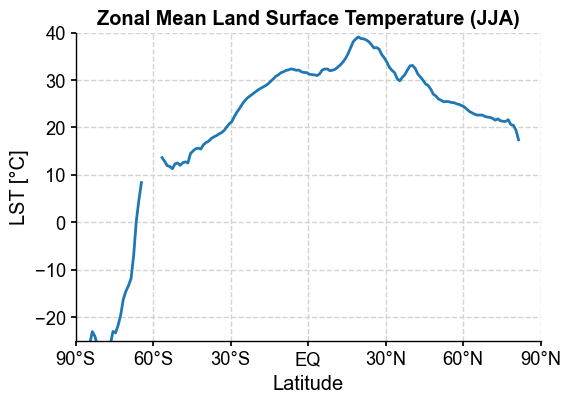

In [7]:
x4c.set_style('journal', font_scale=1.2)
case.calc('zm:LST:6,7,8', load_idx=-1)
fig, ax = case.plot(
    'zm:LST:6,7,8',
    figsize=(6, 4)
)

>>> case.ds["TS"] already loaded; to reload, run case.clear_ds("TS") before case.load("TS")
>>> case.ds["LANDFRAC"] already loaded; to reload, run case.clear_ds("LANDFRAC") before case.load("LANDFRAC")
>>> case.diags["zm:LST:-12,1,2"] created


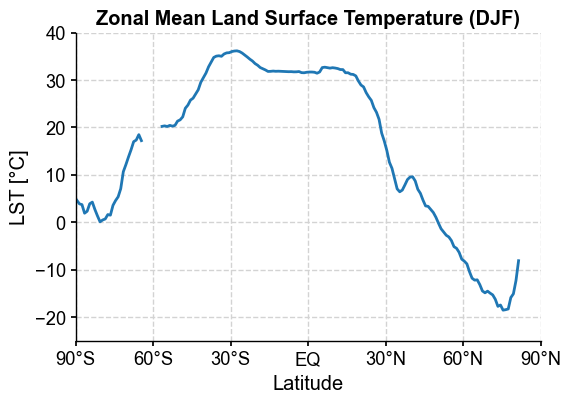

In [8]:
x4c.set_style('journal', font_scale=1.2)
case.calc('zm:LST:-12,1,2', load_idx=-1)
fig, ax = case.plot(
    'zm:LST:-12,1,2',
    figsize=(6, 4)
)

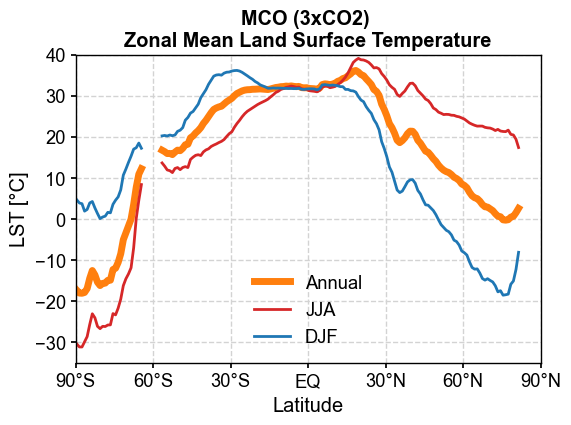

Figure saved at: "figs/zm_LST_compare_seasons.pdf"


In [9]:
x4c.set_style('journal_spines', font_scale=1.2)
fig, ax = case.plot('zm:LST:ann', figsize=(6, 4), label='Annual', color='tab:orange', lw=5, ylim=(-35, 40))
ax = case.plot('zm:LST:6,7,8', ax=ax, label='JJA', color='tab:red', ylim=(-35, 40))
ax = case.plot('zm:LST:-12,1,2', ax=ax, label='DJF', color='tab:blue', ylim=(-35, 40))
ax.set_title('MCO (3xCO2) \nZonal Mean Land Surface Temperature', weight='bold')
ax.legend(loc='lower center')
x4c.showfig(fig)
x4c.savefig(fig, './figs/zm_LST_compare_seasons.pdf')

Regridding from [1, 13826] to [180, 360]
>>> case.ds["TS"] created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["LANDFRAC"] created
>>> case.diags["zm:LST:ann"] created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["TS"] created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["LANDFRAC"] created
>>> case.diags["zm:LST:ann"] created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["TS"] created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["LANDFRAC"] created
>>> case.diags["zm:LST:ann"] created


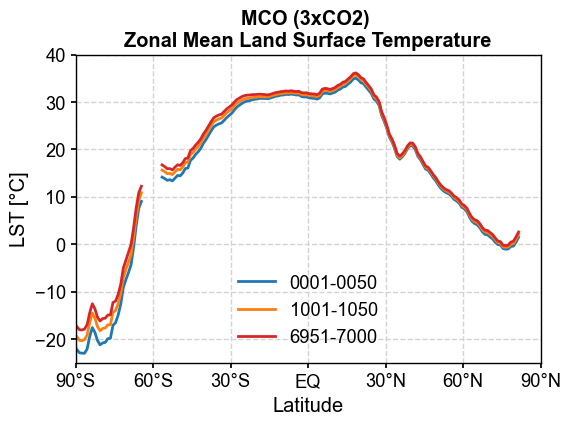

Figure saved at: "figs/zm_LST_compare_spin-ups.pdf"


In [7]:
x4c.set_style('journal_spines', font_scale=1.2)
case.clear_ds()
case.calc('zm:LST:ann', load_idx=0)
fig, ax = case.plot('zm:LST:ann', figsize=(6, 4), label='0001-0050', color='tab:blue')

case.clear_ds()
case.calc('zm:LST:ann', load_idx=20)
ax = case.plot('zm:LST:ann', ax=ax, label='1001-1050', color='tab:orange')

case.clear_ds()
case.calc('zm:LST:ann', load_idx=-1)
ax = case.plot('zm:LST:ann', ax=ax, label='6951-7000', color='tab:red')

ax.set_title('MCO (3xCO2) \nZonal Mean Land Surface Temperature', weight='bold')
ax.legend(loc='lower center')
x4c.showfig(fig)
x4c.savefig(fig, './figs/zm_LST_compare_spin-ups.pdf')